In [1]:
from firstSteps import *
from firstSteps import tools as tls
from firstSteps import parameterEQV3 as para3
import numpy as np
from astropy import constants as const
from astropy import units as u
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [109]:
# Set parameters
# Units
cm = u.cm
cmcubed = 1/ (cm ** 3)
kelv = 1 * u.K
grams = 1 * u.g
gauss = 1 * u.cm ** (-1/2) * u.g ** (1/2) * 1/(1*u.s) # Gauss units in cgs
rads = 1 * u.rad
Hz = 1 * u.Hz


# Variables
r=2
nu = 230 * 10 ** 9 * Hz
x = nu / para3.nu_c_func(r)
r_array = np.logspace(np.log10(2), np.log10(30), 1000) * u.dimensionless_unscaled
nu_array = np.logspace(9, 12, 1000) * u.Hz

In [121]:
# Var Output
print("radius: "+str('{:e}'.format(r * para3.rg_func())))
print( "theta_e: " + str(para3.theta_e_func(rtemp)))
print("B Field: " + str(para3.b_func(rtemp)))

radius: 2.954127e+14 cm
theta_e: 16.916211111635246
B Field: 25.111711608924224 g(1/2) / (cm(1/2) s)


In [3]:
#KWARGS test
print('rg_func: ' + str(para3.rg_func()))
print('rb_func: ' + str(para3.rb_func()))
print('te_func: ' + str(para3.te_func(r)))
print('theta_e_func: ' + str(para3.theta_e_func(r)))
print('nth_func: ' + str(para3.nth_func(r)))
print('b_func: ' + str(para3.b_func(r)))
print('nu_c_func: ' + str(para3.nu_c_func(r)))
print('synchrotron_func: ' + str(para3.synchrotron_func(x)))
print('j_emission_nu_func: ' + str(para3.j_emission_nu_func(r)))
print('specific_Intensiy_func: ' + str(para3.specific_intensity(r)))
print('bright_temp_func: ' + str(para3.bright_temp(r)))


rg_func: 147706327752770.22 cm
rb_func: 2954126555055405.0 cm
te_func: 39862851455.11475 K
theta_e_func: 6.72235189075616
nth_func: 46413.16984373884 1 / cm3
b_func: 9.87013854089748 g(1/2) / (cm(1/2) s)
nu_c_func: 1621918972.7021139 Hz
synchrotron_func: 0.00018906945924937712
j_emission_nu_func: 9.921991043010551e-20 erg / (cm3 Hz s)
specific_Intensiy_func: 2.19831129143845e-05 erg / cm2
bright_temp_func: 1352575903.5590513 K


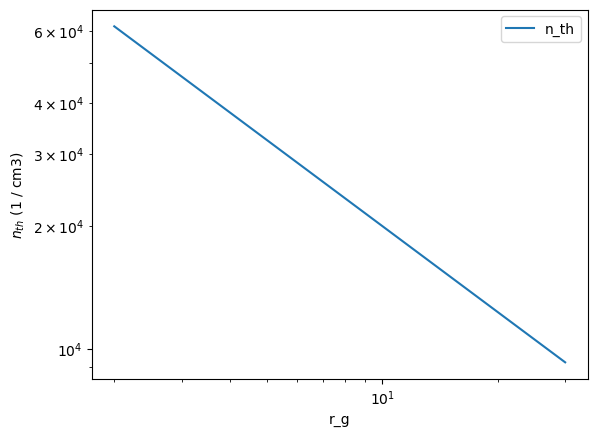

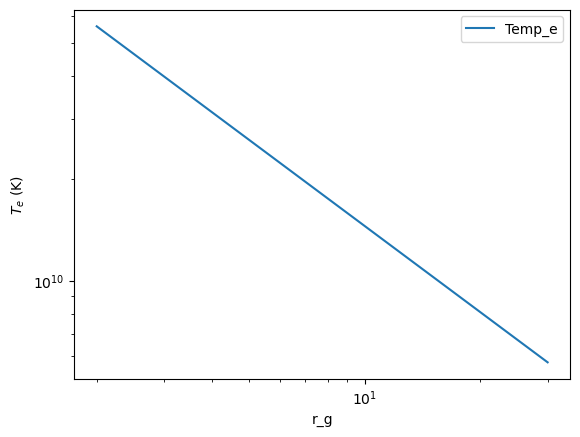

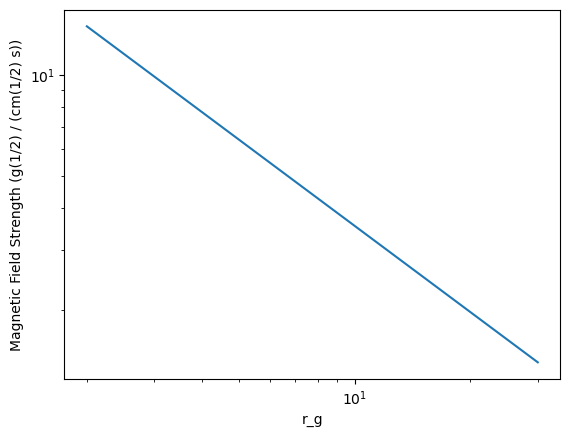

In [110]:
plt.figure(1)
tls.plot_with_units(r_array, para3.nth_func(r_array), label='n_th', xlabel="r_g", ylabel=r'$n_{th}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.figure(2)
tls.plot_with_units(r_array, para3.te_func(r_array), label='Temp_e', xlabel="r_g", ylabel=r'$T_e$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.figure(3)
tls.plot_with_units(r_array, para3.b_func(r_array), xlabel="r_g", ylabel='Magnetic Field Strength')
plt.xscale('log')
plt.yscale('log')

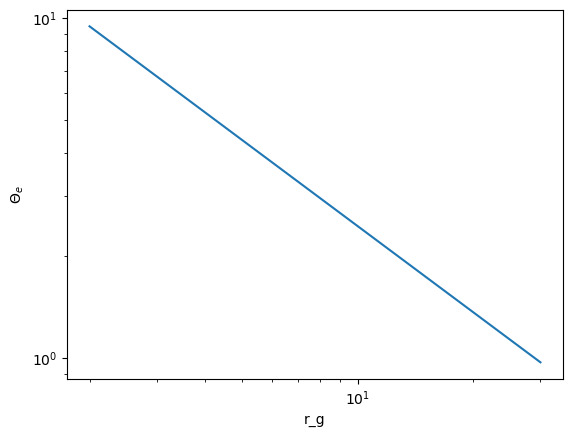

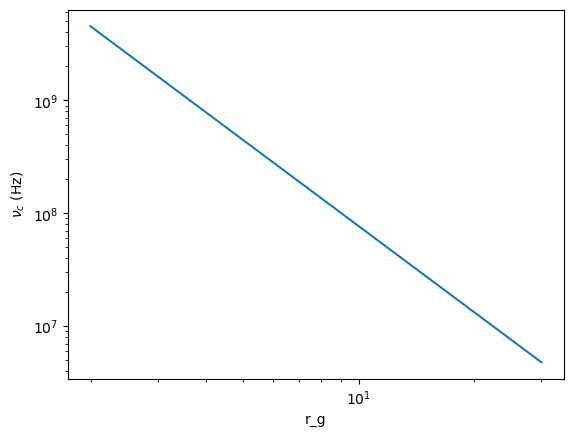

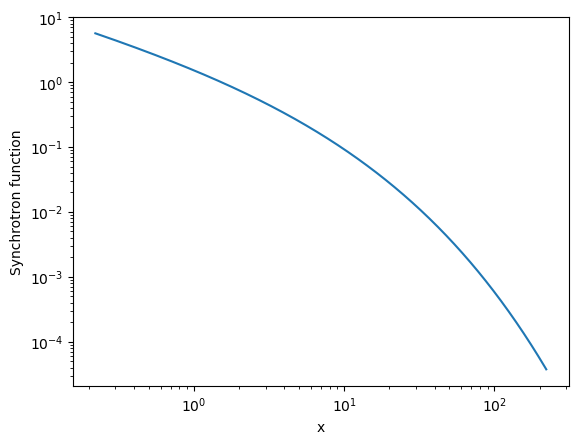

In [119]:
tls.plot_with_units(r_array, para3.theta_e_func(r_array), xlabel='r_g', ylabel=r'$\Theta_e$')
plt.xscale('log')
plt.yscale('log')

plt.figure(2)
tls.plot_with_units(r_array, para3.nu_c_func(r_array), ylabel=r"$\nu_c$", xlabel='r_g')
plt.xscale('log')
plt.yscale('log')

plt.figure(3)
xtemp = nu_array / para3.nu_c_func(r)
tls.plot_with_units(xtemp, para3.synchrotron_func(xtemp), ylabel="Synchrotron function", xlabel='x')
plt.xscale('log')
plt.yscale('log')


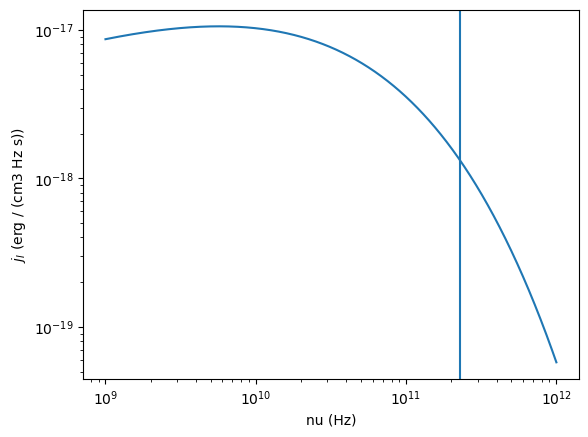

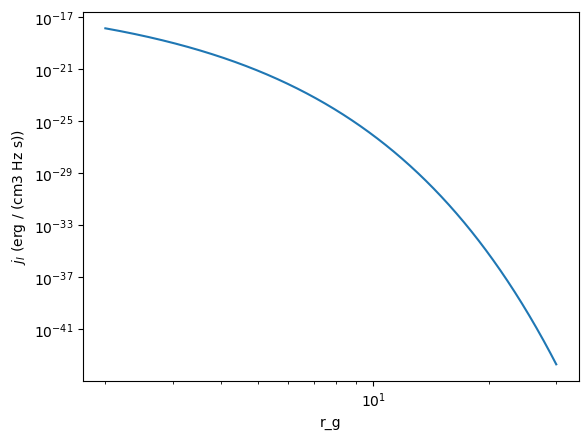

In [120]:
plt.figure(1)
tls.plot_with_units(nu_array, para3.j_emission_nu_func(r, nu_array), 'J coeff', xlabel= 'nu',  ylabel=r'$j_I$')
plt.axvline(230 * 10 ** 9)
plt.xscale('log')
plt.yscale('log')

#SECOND FIGURE

plt.figure(2)
tls.plot_with_units(r_array, para3.j_emission_nu_func(r_array, nu), xlabel="r_g", ylabel=r'$j_I$')
plt.xscale('log')
plt.yscale('log')
#TODO Fix 

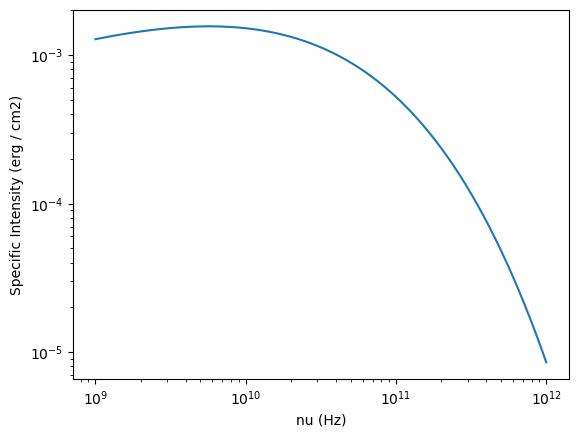

In [94]:
#tls.plot_with_units(r_array, para3.specific_intensity(r_array), xlabel="r_g", ylabel = 'Specific Intensity')
tls.plot_with_units(nu_array, para3.specific_intensity(r, nu_array), xlabel="nu", ylabel = 'Specific Intensity')
plt.xscale('log')
plt.yscale('log')


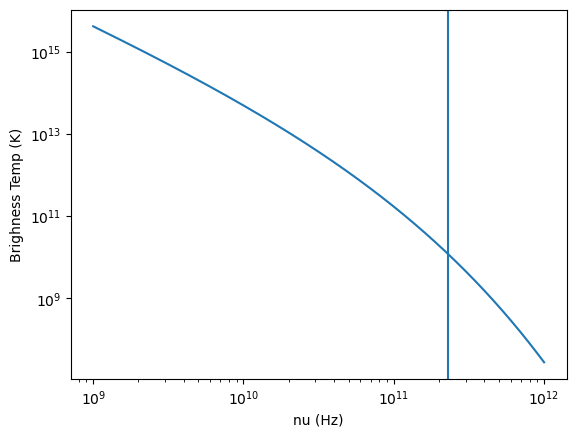

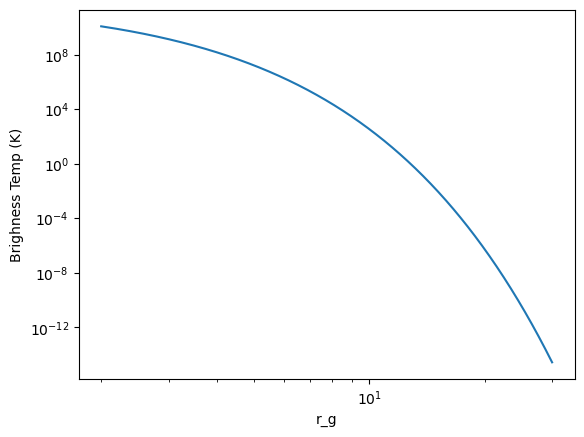

In [99]:
plt.figure(1)
tls.plot_with_units(nu_array, para3.bright_temp(r, nu_array), xlabel="nu", ylabel = 'Brighness Temp')
plt.axvline(230 * 10 ** 9)
plt.xscale('log')
plt.yscale('log')

# SECOND FIGURE

plt.figure(2)
tls.plot_with_units(r_array, para3.bright_temp(r_array, nu=nu), xlabel="r_g", ylabel = 'Brighness Temp')

plt.xscale('log')
plt.yscale('log')